<a href="https://colab.research.google.com/github/sreekanthTa/CNN/blob/main/Introduction_to_computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-04-19 11:00:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.207, 142.250.101.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   166MB/s    in 0.6s    

2025-04-19 11:00:59 (166 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for a computer vision project... this useally means visualiz many samples fo ryour udnerstnad

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"Thre are {len(dirnames)} directories and  {len(filenames)} images in '{dirpath}'. ")

Thre are 2 directories and  0 images in 'pizza_steak'. 
Thre are 2 directories and  0 images in 'pizza_steak/train'. 
Thre are 0 directories and  750 images in 'pizza_steak/train/steak'. 
Thre are 0 directories and  750 images in 'pizza_steak/train/pizza'. 
Thre are 2 directories and  0 images in 'pizza_steak/test'. 
Thre are 0 directories and  250 images in 'pizza_steak/test/steak'. 
Thre are 0 directories and  250 images in 'pizza_steak/test/pizza'. 


In [6]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Apr 19 11:00 .
drwxr-xr-x 1 root root 4096 Apr 19 11:00 ..
drwxr-xr-x 4 root root 4096 Apr 19 11:00 test
drwxr-xr-x 4 root root 4096 Apr 19 11:00 train


# Another way to find out how many images are in a file


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualie our images, first let's get the class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


Let's visualize our images

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  print(f"Target class: {target_class}")
  print(f"Image name: {random_image}")

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

View a random imaeg from the training dataset

Target class: steak
Image name: ['332557.jpg']
Image shape: (289, 512, 3)


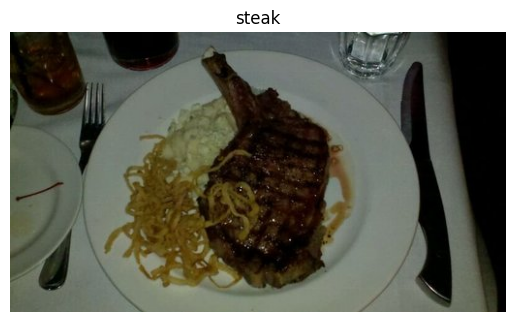

In [10]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [11]:
import tensorflow as tf;

tf.constant(img)

<tf.Tensor: shape=(289, 512, 3), dtype=uint8, numpy=
array([[[  0,  11,   0],
        [  0,  12,   0],
        [  3,  17,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,  11,   0],
        [  0,  11,   0],
        [  0,  13,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,  10,   0],
        [  0,  11,   0],
        [  0,   9,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 97, 104,  86],
        [ 98, 105,  87],
        [ 99, 106,  88],
        ...,
        [  4,   0,   3],
        [  4,   0,   1],
        [  4,   0,   1]],

       [[ 91, 100,  81],
        [ 94, 103,  82],
        [ 96, 105,  86],
        ...,
        [  4,   0,   3],
        [  4,   0,   1],
        [  2,   0,   1]],

       [[ 89, 101,  79],
        [ 91, 103,  79],
        [ 94, 106,  84],
        ...,
        [  2,   0,   

In [12]:
img/255

array([[[0.        , 0.04313725, 0.        ],
        [0.        , 0.04705882, 0.        ],
        [0.01176471, 0.06666667, 0.00784314],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.04313725, 0.        ],
        [0.        , 0.04313725, 0.        ],
        [0.        , 0.05098039, 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.03921569, 0.        ],
        [0.        , 0.04313725, 0.        ],
        [0.        , 0.03529412, 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.38039216, 0.40784314, 0.3372549 ],
        [0.38431373, 0.41176471, 0.34117647],
        [0.38823529, 0

Make sure to keep pixels values between 0 - 1. So, divide by 255  since it is the max val

## An end-to-end example

   Let's build a convolutional neural network to find patterns in our images, more specifically we a need a way to go

    * Load our images
    * Preprocess our images
    * Build a CNN to find patterns in our images
    * Complie our CNN
    * Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our directories
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32,
                                               seed=42)

test_data = valid_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32,
                                             seed=42)



# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 193ms/step - accuracy: 0.5492 - loss: 0.6884 - val_accuracy: 0.8060 - val_loss: 0.4629
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7985 - loss: 0.4739 - val_accuracy: 0.7680 - val_loss: 0.4800
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.7773 - loss: 0.4553 - val_accuracy: 0.8380 - val_loss: 0.3690
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8315 - loss: 0.3870 - val_accuracy: 0.8460 - val_loss: 0.3488
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8500 - loss: 0.3463 - val_accuracy: 0.8400 - val_loss: 0.3513


**Note:* If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to  Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU(you may have to rerun some cells above).

In [14]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

**Practices/Exercise:** Go through the CSNNN explainer website for aminium  of 10- min and aore our nerural entwork with theris: https://oloclub.gighutb.io.cnn-expliae/r

Using the same model as before

## Using the same model as before

Let's replicate the mdoel we've built in a previous secton to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [15]:
# Set randome seed
tf.random.set_seed(42)

# Creaet a model to replicate the TensorFlown Playground model:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                      )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - accuracy: 0.4904 - loss: 4.0791 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.4987 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.4790 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [16]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly... let's try to improve it.

In [17]:
# Set randome seed
tf.random.set_seed(42)

# Creaet a model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                      )

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.5601 - loss: 6.0408 - val_accuracy: 0.6900 - val_loss: 1.1599
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.7043 - loss: 1.1903 - val_accuracy: 0.7280 - val_loss: 0.7352
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.7484 - loss: 0.6239 - val_accuracy: 0.8000 - val_loss: 0.4601
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.7904 - loss: 0.4594 - val_accuracy: 0.8040 - val_loss: 0.4363
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7994 - loss: 0.4657 - val_accuracy: 0.7420 - val_loss: 0.5365


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

## Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visuzliae)

2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)

3. Created a model (start with a baseline)

4. Fit the model (start with a baseline)

5. Evaluate the model

6. Adjust different paremeters and improve the model (try to beat our baseline)

7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Becoming one with the data

Target class: steak
Image name: ['3047807.jpg']
Image shape: (512, 512, 3)
Target class: pizza
Image name: ['2742044.jpg']
Image shape: (512, 512, 3)


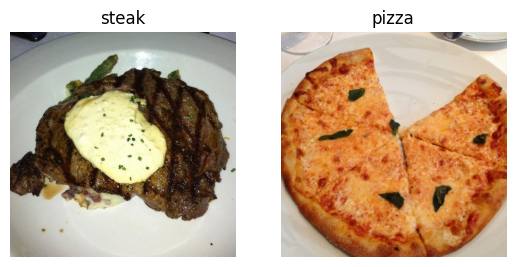

In [19]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/","pizza")
#

### Preprocess the data (prepare it for a model)

In [20]:
# Define directory dadtaset paths

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn our data into  **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your preprocessor(GPU)

2. Trying to learn the patterns in 10,000 imaes in one hit could result in the model not being able to learn very well.

Why 32 ?

Becuase 32 is good for your health... check Yanlee cun post on twitter

In [21]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [22]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target dir of images
                                               target_size=(224, 224), # Target size of class
                                               class_mode="binary", # type of data you are working with here it isclassification
                                               batch_size=32) # size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32
                                             )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [23]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the  "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there ?
len(train_data)

47

In [25]:
1500/32

46.875

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [27]:
# View the first batch of labels
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begining a machine learning experimenting, you try to beat the baseline.

**Note:** In dee learning, there is almost an infinite amount of architecures you could create. So one of the best way sto get started is  to start with something ismple and see if it works and your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem(

In [28]:
# Make the creating of our model a little easier.
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [29]:
# Create hte mdoel (thie swill be our bawseline, al lyae rconvolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input  (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           activation="relu", # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same  as input shape, if "valid", output shape gets compressed
           input_shape=(224, 224, 3)), # input layer  (specify input hsape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with bianary classifaccton  so only 1 output neuron)
])


Note : Check PapersWithCode

In [30]:
# Compile the model
model_4.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
    )

In [31]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [32]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [33]:
# Fit the model
history_4 = model_4.fit(
    train_data, # this is a combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_data), # takes 47 each time step
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - accuracy: 0.6048 - loss: 1.2523 - val_accuracy: 0.7160 - val_loss: 0.5670
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7626 - loss: 0.5020 - val_accuracy: 0.8780 - val_loss: 0.3294
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8548 - loss: 0.3415 - val_accuracy: 0.8700 - val_loss: 0.3032
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.9398 - loss: 0.1923 - val_accuracy: 0.8240 - val_loss: 0.3733
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9744 - loss: 0.1092 - val_accuracy: 0.8540 - val_loss: 0.3556


## 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<Axes: >

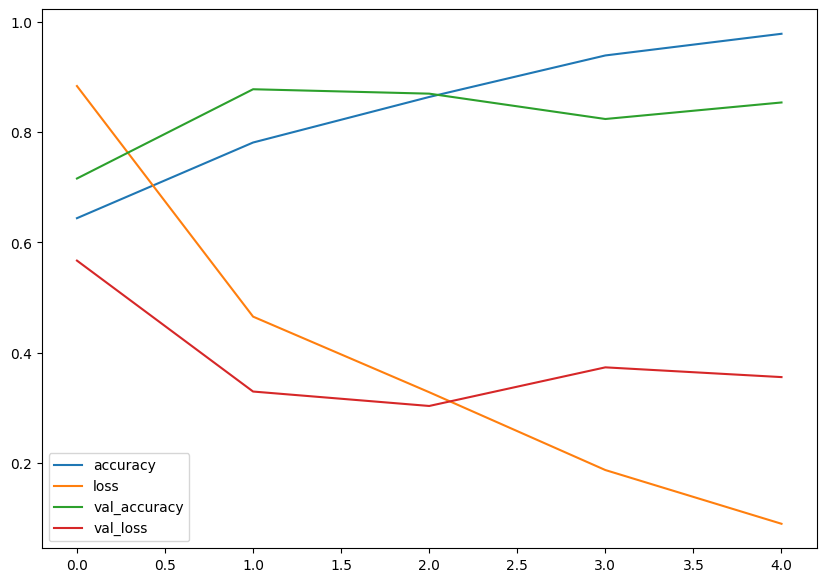

In [34]:
# Lets plot the training curves

import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [35]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
   """
     Returns separate loss curves for training and validation metrics.
   """
   loss = history.history["loss"]
   val_loss = history.history["val_loss"]

   accuracy = history.history["accuracy"]
   val_accuracy = history.history["val_accuracy"]

   epochs = range(len(history.history["loss"]))

   # Plot loss
   plt.plot(epochs, loss, label="training_loss")
   plt.plot(epochs, val_loss, label="val_loss")
   plt.title("Loss")
   plt.xlabel("Epochs")
   plt.legend()

   # Plot accuracy
   plt.figure()
   plt.plot(epochs, accuracy, label="training_loss")
   plt.plot(epochs, val_accuracy, label="val_loss")
   plt.title("accuracy")
   plt.xlabel("Epochs")
   plt.legend()



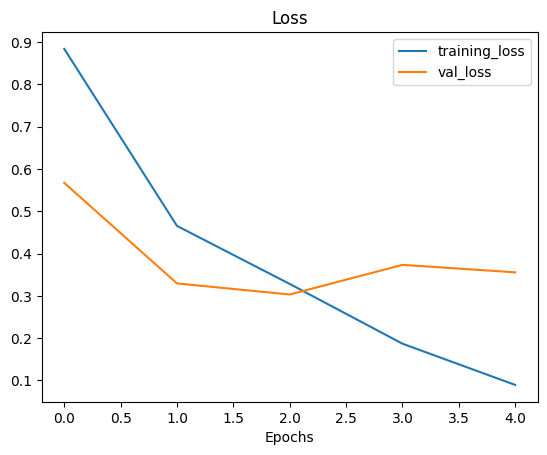

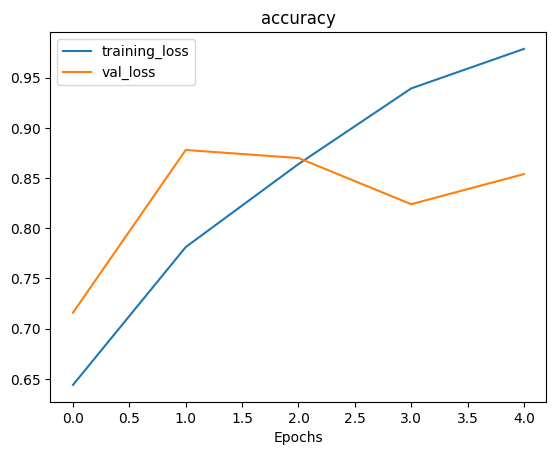

In [36]:
# Check out the loss and accuracy curves
plot_loss_curves(history_4)

**Note:** When a model's ** validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset **too well** and thus the model's ability to generalize to unseen data will be diminshed.

### 6. Adjust the model parameters

Fitting  a machine learning model  comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
3. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augemntation
* Add regularization (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also know as **regularization**

In [37]:
# Create the model  (this is going to be our new baseline)# Create hte mdoel (thie swill be our bawseline, al lyae rconvolutional neural network)
model_5 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input  (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           activation="relu", # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same  as input shape, if "valid", output shape gets compressed
           input_shape=(224, 224, 3)), # input layer  (specify input hsape)
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with bianary classifaccton  so only 1 output neuron)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
    )

In [39]:
# Fit the model
history_5 = model_5.fit(
    train_data, # this is a combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_data), # takes 47 each time step
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 153ms/step - accuracy: 0.5417 - loss: 0.6722 - val_accuracy: 0.7560 - val_loss: 0.4992
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.7383 - loss: 0.5586 - val_accuracy: 0.8240 - val_loss: 0.3867
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - accuracy: 0.8197 - loss: 0.4100 - val_accuracy: 0.8360 - val_loss: 0.3673
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.8267 - loss: 0.3953 - val_accuracy: 0.8440 - val_loss: 0.3629
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8513 - loss: 0.4000 - val_accuracy: 0.8680 - val_loss: 0.3332


In [40]:
# Get a sunnary of our model with max pooling
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

In [41]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,432,025 (5.46 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 954,684 (3.64 MB)

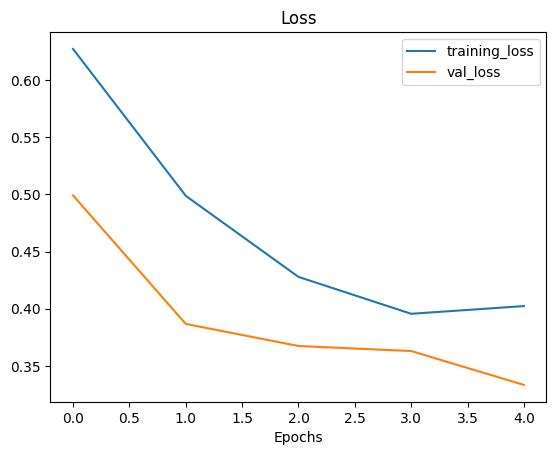

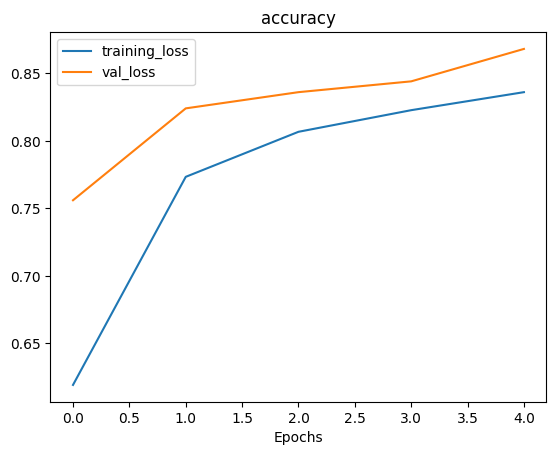

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks  and find data augmentation

In [43]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(
                                                  rescale=1/255.,
                                                  rotation_range=0.2,
                                                  width_shift_range=0.2,
                                                  height_shift_range=0.2,
                                                  shear_range=0.2,
                                                  zoom_range=0.2,
                                                  horizontal_flip=True,
                                                  fill_mode='nearest'
                                              )

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen= ImageDataGenerator(rescale=1/255.)

**Question:** What is dta augmentation ?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to elarn more generlizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [44]:
# Import data and augment it from training directory
print("Augmented training data")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False # for demonstration purpose only
    )

# Create non-augmente train data batches
print("Non Augmented data")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
    )

# Create non-augmeneted test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented data
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left a sthey ar ein the directories but are modifed as they;re loaded into the model.

Finally...let's visualize some augmented data!!!

In [45]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_datagen_augmented) # note: labels aren augmented only data

showing image number: 19


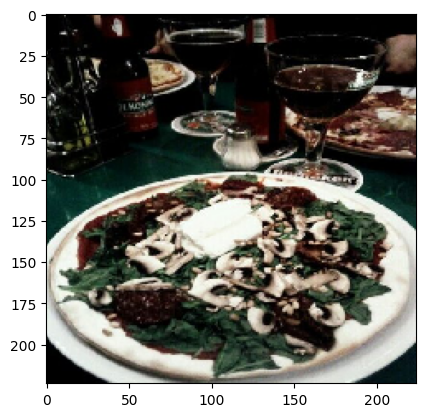

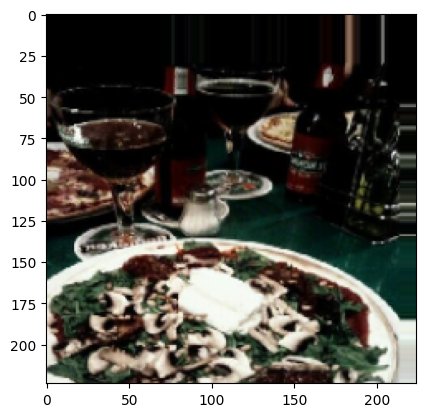

In [46]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.figure()
plt.imshow(augmented_images[random_number])

Now we've seen what agu,ented training dat alooks like, let;s build a model


In [49]:
# Create the model  (this is going to be our new baseline)# Create hte mdoel (thie swill be our bawseline, al lyae rconvolutional neural network)
model_6 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input  (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           activation="relu", # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same  as input shape, if "valid", output shape gets compressed
           input_shape=(224, 224, 3)), # input layer  (specify input hsape)
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with bianary classifaccton  so only 1 output neuron)
])

# Compile the model
model_6.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
    )

# Fit the model
history_6 = model_6.fit(
    train_datagen_augmented, # this is a combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_datagen_augmented), # takes 47 each time step
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 416ms/step - accuracy: 0.5082 - loss: 0.7279 - val_accuracy: 0.5420 - val_loss: 0.6822
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 409ms/step - accuracy: 0.4707 - loss: 0.6966 - val_accuracy: 0.8060 - val_loss: 0.6682
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 411ms/step - accuracy: 0.5537 - loss: 0.6831 - val_accuracy: 0.7700 - val_loss: 0.6387
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.6481 - loss: 0.6574 - val_accuracy: 0.5000 - val_loss: 2.4137
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 407ms/step - accuracy: 0.7349 - loss: 0.4759 - val_accuracy: 0.6560 - val_loss: 0.5808


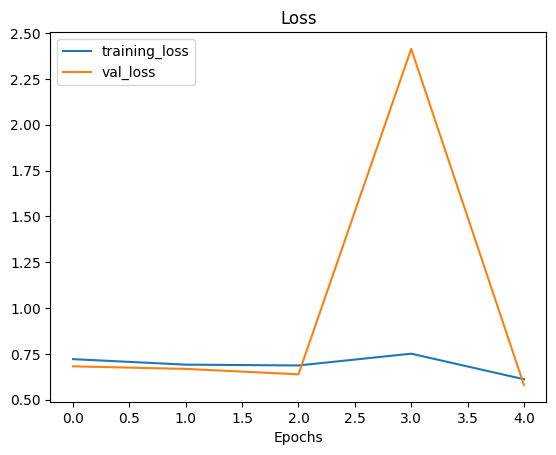

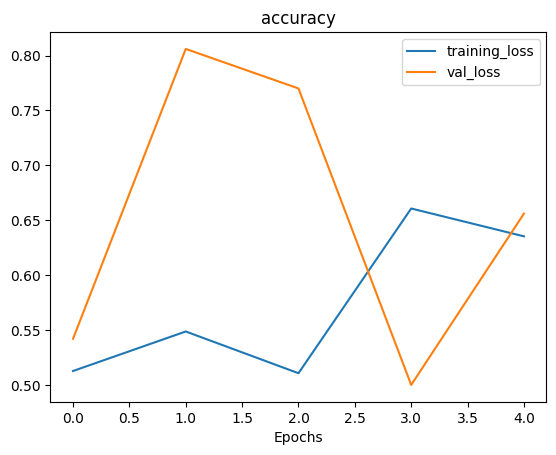

In [50]:
# Check out models training cuves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [53]:
# Import data and augment it and shuffle from training directory
train_datagen_augmented.shuffle = True


train_datagen_augmented_shuffled = train_datagen_augmented

In [54]:
# Create the model (same as model 5 and model 6)
# Create the model  (this is going to be our new baseline)# Create hte mdoel (thie swill be our bawseline, al lyae rconvolutional neural network)
model_7 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input  (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           activation="relu", # the size of the step the sliding window takes across an input
           padding="valid", # if "same", output shape is same  as input shape, if "valid", output shape gets compressed
           input_shape=(224, 224, 3)), # input layer  (specify input hsape)
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with bianary classifaccton  so only 1 output neuron)
])

# Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
    )

# Fit the model
history_7 = model_7.fit(
    train_datagen_augmented_shuffled, # this is a combination of labels and sample data
    epochs=5,
    steps_per_epoch=len(train_datagen_augmented_shuffled), # takes 47 each time step
    validation_data=test_data,
    validation_steps=len(test_data)
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 415ms/step - accuracy: 0.5249 - loss: 0.6834 - val_accuracy: 0.7880 - val_loss: 0.5888
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - accuracy: 0.6708 - loss: 0.6018 - val_accuracy: 0.6820 - val_loss: 0.5770
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 409ms/step - accuracy: 0.7541 - loss: 0.5235 - val_accuracy: 0.8600 - val_loss: 0.3607
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 406ms/step - accuracy: 0.7968 - loss: 0.4641 - val_accuracy: 0.8200 - val_loss: 0.3725
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 418ms/step - accuracy: 0.7934 - loss: 0.4575 - val_accuracy: 0.8440 - val_loss: 0.3534


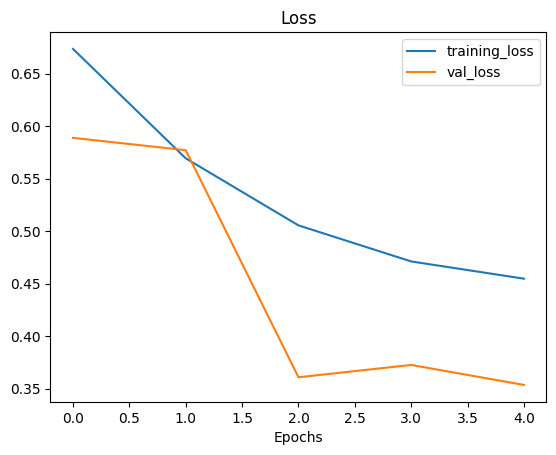

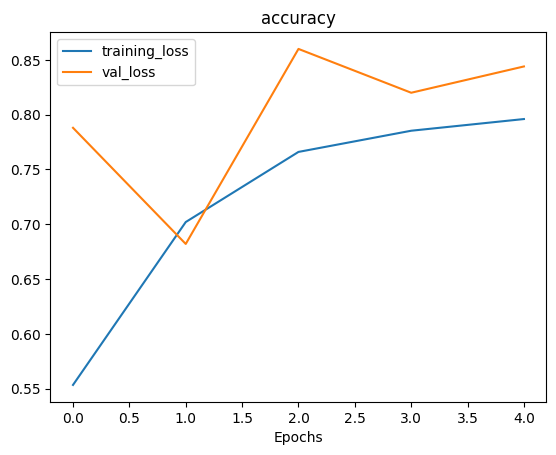

In [55]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data the model gets exposed to all differnet kinds of data during training, thus enabling it to learn featuers across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to conitue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convultion layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more oppurtunities to learn)
* Use ** transfer learning** to leveragte what anotehr imaeg model has learn and asdjust it for our own use case

** Practice: ** Recreate the model on the CNN explainer website (same as  `model_1` and see how it performs on the augmented shuffled training data.
